# Machine learning

## Types 
#### Supervised: 
Given a set of data the task is to learn the relationship between the input x and output y such that, when given a novel input x* the predicted y* is accurate. Accuracy is measure by some Loss function e.g. MSE (mean squared errors)
Regression (linear/logistic), SVM, K-nearest neighbours etc. 

#### Unsupervised:
Given a set of data we aim to find a plausible compact description of data. An objective is used to quantify tge accuracy of the description e.g. retained variance.
In essence we are interested in modelling the distribution of x.
Principal component analysis, K means clustering etc.

#### Anomaly Detection
#### Online (sequential) learning
#### Semi supervised learning
#### Self supervised learning (turing learning)

In [314]:
import os 
os.system('pip install -U -r requirements.txt')

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

## Generate data

In [483]:
np.random.seed(42)

x_lo = np.random.normal(15,3, (200,1))
y_lo = (x_lo**2)/2+1*x_lo + 1
x_hi = np.random.normal(25,3, (200,1))
y_hi = (x_hi**2)/2+x_hi*1.5+2
x    = np.concatenate((x_lo, x_hi), axis=0)
y    = np.concatenate((y_lo, y_hi), axis=0)
yn   = np.random.normal(3,5, y.shape) + y

xs, i = np.unique(x, return_index=True, axis=0) # axis preserves the shape of returned array
ys    = yn[i]

x_partition = np.where(xs<20)[0][-1]

x_lo = xs[:x_partition]
y_lo = ys[:x_partition]
x_hi = xs[x_partition:]
y_hi = ys[x_partition:]


## Linear regression

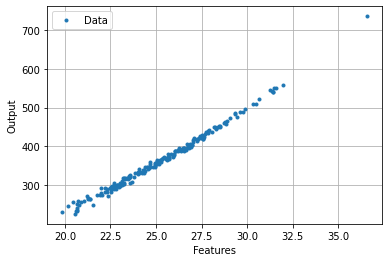

In [484]:
# plot to see linearity

plt.plot(x_hi, y_hi, '.', label='Data')
plt.xlabel('Features')
plt.ylabel('Output')
plt.legend()
plt.grid()


#### fit a polynomial  $ y = \theta_{0}x + \theta_{1} $


Theta:  [array([27.61649574]), array([-332.29579627])]


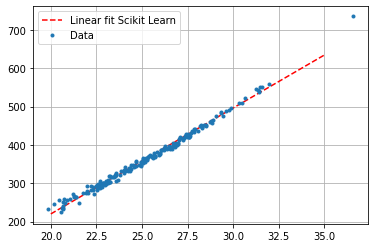

In [501]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
X       = x_hi.reshape(-1,1)
y       = y_hi
lin_reg.fit(X, y)

theta    = [lin_reg.coef_[0], lin_reg.intercept_]
print('Theta: ', theta)

x_new         = np.arange(20, 36)
x_to_predict  = x_new.reshape(-1, 1)
y_predicted   = lin_reg.predict(x_to_predict)

plt.plot(x_new, y_predicted,'--r', label='Linear fit Scikit Learn')
plt.plot(x_hi, y_hi, '.', label='Data')
plt.legend()
plt.grid()

#### Matrix inversion (The logic behind)  
Let's assume, <br/>

$ y = [x, 1]*[\theta_{0}, \theta_{1}]'$

or 

$ Y = X*\Theta \hspace{0.5cm} remember \hspace{0.5cm} X = [x, 1] ; \hspace{0.5cm} \Theta = [\theta_{0}, \theta_{1}]'$

but, X is not a square matrix. In such situation mathematically we can only find pseudo-inverse.

$ pseudo inverse = inv(X*X'), \hspace{0.5cm} X*X' $ is a square symmetric matrix  
or, $ pseudo inverse = pinv(X) $

so   $ \hspace{0.5 cm} \Theta = pinv(X)*Y $

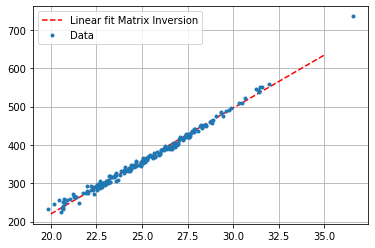

In [508]:
X        = np.c_[x_hi, np.ones((len(x_hi),1))]
y        = y_hi

theta    = np.linalg.pinv(X)@y

x_new         = np.arange(20, 36)
x_to_predict  = np.c_[x_new, np.ones((len(x_new),1))]
y_predicted   = x_to_predict@theta

plt.plot(x_new, y_predicted,'--r', label='Linear fit Matrix Inversion')
plt.plot(x_hi, y_hi, '.', label='Data')
plt.grid()
plt.legend()
plt.show()


### Linear Parameter Model
Such models are also called linear parameter models. The key is model is linear in its parameters not necessarily in it's input vs output relationship.

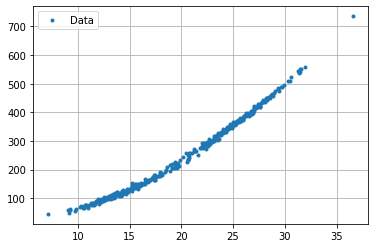

In [490]:
plt.plot(xs, ys, '.',label='Data')
plt.legend()
plt.grid()


Let's assume

$ y = \alpha_{0}*(x^{\alpha_{1}}) $

$ log(y) = \alpha_{1} * log(x) + log(\alpha_{0}) $

or   $ y_{transformed}  = \theta_{0} * x_{transformed} + \theta_{1} \hspace{0.5cm}, where \hspace{0.5cm} \theta_{0} = \alpha_{1},\hspace{0.5cm} \theta_{1} = log(\alpha_{0}) $

alternately $ Y = X* \Theta  \hspace{0.5cm}, where \hspace{0.5cm} Y = log(y),\hspace{0.5cm} X = [log(x), 1] $ 

and we know that $ \Theta = pinv(X)*Y $ , 
Note numerical inversion methods ensure optimum fit in a way

/mnt/c/Users/MZ9UTE/OneDrive - Vantage Power Ltd/projects/matlab/venv/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


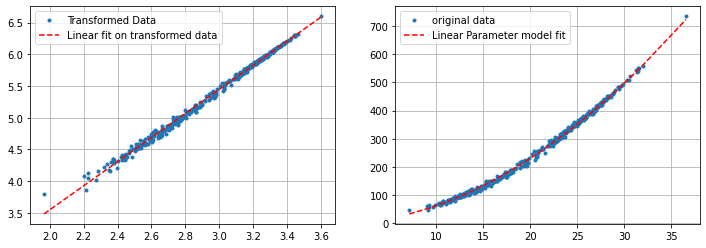

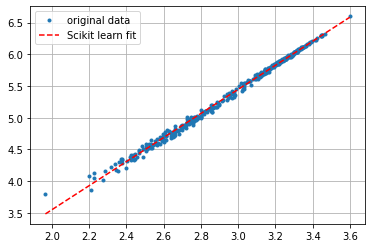

In [509]:
x_transformed = np.log(xs);
y_transformed = np.log(ys);

# Plot transformed (new) data
fig = plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(x_transformed, y_transformed, '.', label='Transformed Data')
plt.legend()
plt.grid()

X         = np.c_[x_transformed, np.ones((len(x_transformed),1))]
theta     = np.linalg.pinv(X)@y_transformed

x_to_predict               = X
y_predicted_transformed    = x_to_predict@theta

plt.subplot(1,2,1)
plt.plot(x_transformed, y_predicted_transformed, '--r',label='Linear fit on transformed data')
plt.legend()

# Consequently, 

y_predicted_original  = np.exp(theta[1])*xs**theta[0]
plt.subplot(1,2,2)
plt.plot(xs, ys, '.', label='original data')
plt.plot(xs, y_predicted_original, '--r', label='Linear Parameter model fit')
plt.legend()
plt.grid()
plt.show()


# Or using sklearn
X        = x_transformed.reshape(-1,1)
y        = y_transformed
lin_reg  = LinearRegression()
lin_reg.fit(X,y)

y_predicted = lin_reg.predict(X)

plt.plot(X, y, '.', label='original data')
plt.plot(X, y_predicted, '--r', label='Scikit learn fit')
plt.legend()
plt.grid()
plt.show()

#### Measure of Accuracy  

$ R^2: $ Goodness of fit 

What % of variance in data is explained by the model  

i.e. 100% - (Residual variance in the data)/(Variance of data)  

or $$ R^2 = \frac{1 - [(y_1^* - y_1)^2 + (y_2^*-y_2)^2 + ...]}{var(y)} $$

This means if $R^2$ is 0 then y cannot be explained by knowing x.

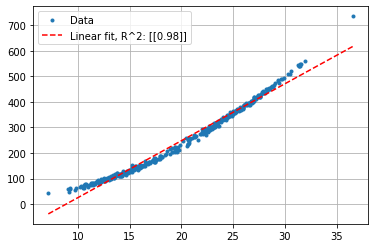

In [511]:
plt.plot(xs, ys, '.', label='Data')

X           = xs.reshape(-1,1)
y           = ys
lin_reg     = LinearRegression()

lin_reg.fit(X,y)
y_predicted = lin_reg.predict(X)

model_error   = ys - y_predicted
de_mean_ys    = ys - np.mean(ys)
r_squared     = np.round(1 - (model_error.T@model_error)/(de_mean_ys.T@de_mean_ys),2)

plt.plot(xs, y_predicted, '--r',label=('Linear fit, R^2: ' + str(r_squared)))
plt.grid()
plt.legend()
plt.show()

## Bayesian Reasoning
The above approach to machine learning is empirical.
Bayesian reasoning dictates not to discard the prior knowledge available rather start from it. (especially useful for higher dimensional data and allows to make use of prior subject matter knowledge)

There are 2 main approaches using which parameters can be fit using Bayesian reasoning:  
* **Discriminative**: In essence we identify the boundary that separates classes or find the linear regression function.  
* **Generative**: In essence we start with how x itself is distributed for different classes in y  and build from there.

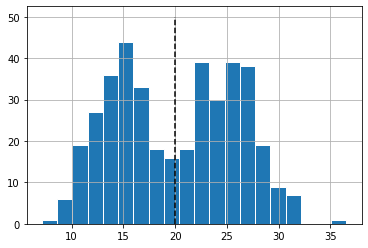

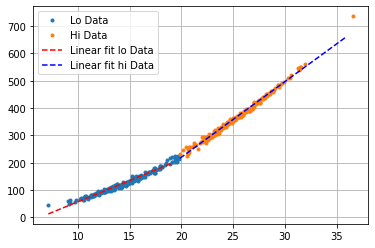

In [517]:
plt.hist(xs,20, ec='white')
plt.plot([20, 20], [0, 50], '--k')
plt.grid()
plt.show()

# Knowing xs is distributed in a certain way we can fit different models to parts of xs. Here we divide xs < 20 and xs > 20 and corresponding ys

plt.plot(x_lo, y_lo, '.', label='Lo Data') 
plt.plot(x_hi, y_hi, '.', label='Hi Data')

X_lo        = x_lo.reshape(-1,1)
lin_reg_lo  = LinearRegression()
lin_reg_lo.fit(X_lo, y_lo)

X_hi        = x_hi.reshape(-1,1)
lin_reg_hi  = LinearRegression()
lin_reg_hi.fit(X_hi, y_hi)

model_error_lo   = y_lo - lin_reg_lo.predict(X_lo)
de_mean_y_lo     = y_lo - np.mean(y_lo);
r_squared_lo     = 1 - (model_error_lo.T@model_error_lo)/(de_mean_y_lo.T@de_mean_y_lo)

model_error_hi   = y_hi - lin_reg_hi.predict(X_hi)
de_mean_y_hi     = y_hi - np.mean(y_hi);
r_squared_hi     = 1 - (model_error_hi.T@model_error_hi)/(de_mean_y_hi.T@de_mean_y_hi)

x_new            = np.arange(min(x_lo), max(x_lo))
x_to_predict     = x_new.reshape(-1,1)
y_predicted      = lin_reg_lo.predict(x_to_predict)
plt.plot(x_to_predict, y_predicted, '--r', label='Linear fit lo Data')

x_new            = np.arange(min(x_hi), max(x_hi))
x_to_predict     = x_new.reshape(-1,1)
y_predicted      = lin_reg_hi.predict(x_to_predict)
plt.plot(x_to_predict, y_predicted, '--b', label='Linear fit hi Data')
plt.legend()
plt.grid()
plt.show()


## Gradient Descent
The objective of linear regression is to minimize the cost function which is MSE (mean squared error). 
$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^{2} $$

This is a convex function in $ \theta $, which is very good to achieve global minima.
*m* is number of examples (data points) and the hypothesis $ h_{\theta}(x) $ is given by the linear model

$$ h_{\theta}(x) = \theta^{T}x = \theta_{0} + \theta_{1}x_{1}  $$

The parameters of your model are the $\theta$ values. These are the values you need to adjust to minimize cost $J(\theta)$. One way to do this is to use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update  

$$ \theta_{j} := \theta_{j} - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_{j}^{(i)}  $$  (simultaneously update $\theta_{j}$ for all *j* (features))

With each step of gradient descent, your parameters $\theta_{j}$ come closer to the optimal values (by step size $\alpha$) that will achieve the lowest cost $J(\theta)$.

**Also very important that x's and even y's are scaled to be between 0 and 1 for proper convergence**

In [524]:
m = len(x_transformed); # number of training examples

X = np.c_[x_transformed, np.ones(x_transformed.shape)]
y = y_transformed

#### Computing the cost $J(\theta) $
 It is helpful to monitor the convergence at each iteration by computing the cost, which is mean squared error of predicted outputs. 

Also, we can check the convexity of cost function.

In [543]:
def compute_cost(X, y, theta):
    y    = y.ravel()
    m    = len(y)
    j    = 0
    hx   = X@theta
    j    = 1/(2*m)*((hx-y).T@(hx-y))
    return j


def gradient_descent(X, y, theta, alpha, num_iterations):
    y = y.ravel()
    m = len(y) # number of training examples
    j_history = np.zeros((num_iterations, 1))

    for iter in range(num_iterations):
        j_history[iter] = compute_cost(X, y, theta) # Save the cost J in every iteration
        hx              = X@theta
        theta           = theta - alpha*1/m*(hx-y)@X
    return theta, j_history


def visualise_cost_function(X, y, theta=[]):
    theta0_vals = np.linspace(-10,10, 100)
    theta1_vals = np.linspace(-10,10,100)
    
    # Initialise j_vals to a matrix of 0's
    j_vals = np.zeros((len(theta0_vals), len(theta1_vals)))
    
    # fill out j_vals
    for i, theta0 in enumerate(theta0_vals):
        for j, theta1 in enumerate(theta1_vals):
            t = np.array([theta0, theta1])
            j_vals[i,j] = compute_cost(X,y,t)
            
            
    j_vals = np.transpose(j_vals)
    
    # Surface plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(theta0_vals, theta1_vals, j_vals, cmap=cm.jet)
    plt.xlabel('theta0')
    plt.ylabel('theta1')
    plt.show()
    
    if np.any(theta):
        # Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
        plt.contour(theta0_vals, theta1_vals, j_vals, levels=np.logspace(-2, 3, 20))
        plt.xlabel('theta0')
        plt.ylabel('theta1')
        plt.plot(theta[0], theta[1], 'rx')
    


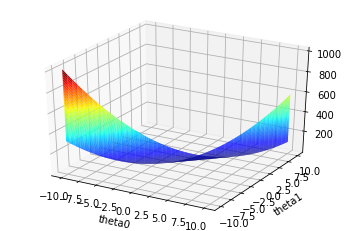

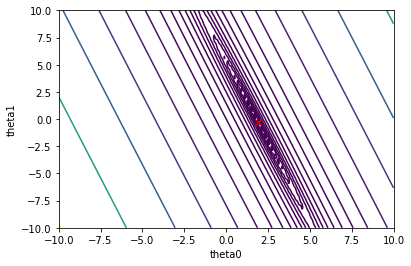

In [544]:
# Compute and display initial cost with theta all zeros. Answer should be almost 14

compute_cost(X, y, [0, 0])

visualise_cost_function(X, y, theta)

#### Gradient Descent
Keep in mind that the cost $J(\theta)$ is parameterized by the vector $\theta$, not $X$ and $y$. That is, we minimize the value of $J(\theta)$ by changing the values of the vector $\theta$, not by changing $X$ or $y$.

A good way to verify that gradient descent is working correctly is to look at the value of $J$ and check that it is decreasing with each step.  
The function **gradient_descent** calls **compute_cost** on every iteration and prints the cost. If you have implemented **gradient_descent** and **compute_cost** correctly, your value of  should never increase, and should converge to a steady value by the end of the algorithm.

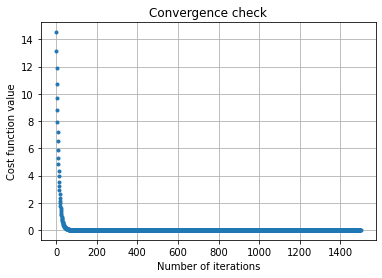

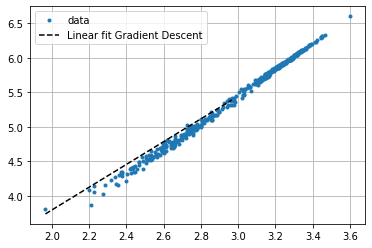

In [549]:
# Run gradient descent:
theta = np.array([0, 0]) # initialize fitting parameters
iterations = 1500
alpha = 0.005 # Learning rate (not too small not too big)

# Compute theta
theta, j_theta = gradient_descent(X, y, theta, alpha, iterations)

plt.plot(np.arange(iterations), j_theta, '.')
plt.title('Convergence check')
plt.xlabel('Number of iterations')
plt.ylabel('Cost function value')
plt.grid()
plt.show()

x_new        =  np.arange(min(x_transformed), max(x_transformed))
x_to_predict =  np.c_[x_new, np.ones(x_new.shape)]
y_predicted  =  x_to_predict@theta
plt.plot(x_transformed, y_transformed, '.', label='data')
plt.plot(x_new, y_predicted,'--k', label='Linear fit Gradient Descent')
plt.legend()
plt.grid()
plt.show()

## Topics for future ?
#### Linear Regression (Supervised):
* Influence of learning rate and using different rates in gradient descent
* Feature Normalization
* Regularisation
* Model Performance metrics
* Stochastic Gradient descent
* Using a cost function whose derivative function is not known
#### Logistic Regression (Supervised)
#### Decision Tree
#### Principal component analysis (Unsupervised)
